In [1]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-03-29 00:30:05--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-03-29 00:30:05--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3872b02a5b91f4b36ebac048ca.dl.dropboxusercontent.com/cd/0/get/BiU4ayM1d4BLLJ47mjkQyJ20N-HPCEeGRvU9tR3a4M_7UpoCF_-PDt5ecq9JzhiIMiCg82YhQY2XklvzoXXPbwuiSoAANUg0QGJt02EoUO66d-uz8KzYc577CSoXiMRltnulC--96kedVbiLFu-8ODTl0MjK5Kem4NurlPt5m-fXh8IRYvgbNBiDKpax20wTR5w/file?dl=1# [following]
--2022-03-29 00:30:05--  https://uc3872b02a5b91f4b36ebac048ca.dl.dropboxusercontent.com/cd/0/get/

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
import torch.nn.functional as F
import random
from torchtext.legacy import data
import numpy as np
from konlpy.tag import Okt, Mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
# !pip install jamo

In [5]:
df=pd.read_csv('/content/la.csv')
df2=pd.read_csv('/content/labeled_data.csv')
df=df.iloc[:7001,:]

In [6]:
df2=df2[df2['label'].isin([1.0,0.0])]
df2.rename({'data':'text'},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df=df.append(df2)
df[df['label']==1]

,Unnamed: 0,Unnamed: 0.1,text,label
1,1.0,1.0,저새끼 막판 탄핵으로 못 끌어내리냐 연금쳐받는것도 좆같은데,1.0
3,3.0,3.0,이새끼는 맨날 삐지고 격노하고 ㅅㅂ,1.0
5,5.0,5.0,여윽시 엄빠가 없는 분들이 뽑은 19대 머통령 문재인\n개념도 없고 상식도 없쥬,1.0
6,6.0,6.0,진짜 꼭 부정선거 조사 철저히 해야함. 이거 안하면 계속 지들이 국민 절반의 지지를...,1.0
7,7.0,7.0,그냥 처음 계획대로 광화문가라대통령 출근하는 신호 안 잡으면 되는데 왜 신호 잡아서...,1.0
...,...,...,...,...
7586,NaN,NaN,씨발 데스윙 스태츄라길래 기대 하고 있었는데 사이즈 좆만한거 뭐고 ㅋㅋㅋ,1.0
7587,NaN,NaN,ㅅㅂ 제목으로 낚시 잘하네. 신문기자냐?,1.0
7589,NaN,NaN,아모캣 빵끈게이와 두손잡고 동반부활,1.0
7595,NaN,NaN,개븅신같네 ㅋㅋㅋㅋㅋㅋㅋ,1.0


In [8]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r"[^ㄱ-ㅎ가-힣]", " ", x))
df['text'] = df['text'].apply(lambda x: re.sub(r"\d+", " ", x))
df.drop(df.loc[df['text']==' '].index, inplace=True)

In [9]:
df[df['text'].str.endswith('- dc App')]['text']

Series([], Name: text, dtype: object)

In [10]:
df['text'] = df['text'].apply(lambda x: x.replace("- dc App", ""))

In [11]:
okt = Okt()
mecab = Mecab()
# from konlpy.tag import Mecab
# def tokenize_sentence(text):
#     mecab=Mecab()
#     return mecab.morphs(text)
# sentence = df['text'].str.split().tolist()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [12]:
# a=[]
# for i in df['text'].tolist():
#   a.append(tokenize_sentence(i))

a = []
for sentence in tqdm(df['text'].tolist()):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    a.append(stopwords_removed_sentence)


100%|██████████| 14562/14562 [01:09<00:00, 210.62it/s]


In [93]:
ex='새싹여러분들 화이팅'
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
to_ex=okt.morphs(ex, stem=True)
ex2 = [word for word in to_ex if not word in stopwords] # 불용어 제거
ex2

['새싹', '여러분', '화이팅']

In [70]:
mmmm.to_csv('a.csv')

In [81]:
import math
mmmm = pd.read_csv('a.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0        0
0               104
1              1096
2              2323
3              3862
              ...  
219           14561
220           14561
221           14561
222           14561
223           14561
Length: 225, dtype: int64

In [84]:
mmmm.drop('Unnamed: 0',axis=1,inplace=True)
mmmm=mmmm.fillna('l')
pppp=mmmm.values.tolist()
for i in pppp:
  while 'l' in i:    
	  i.remove('l')
pppp

In [43]:
import csv


with open("a.csv", 'w') as file:
  writer = csv.writer(file)
  writer.writerow(a)



In [13]:
# from jamo import h2j, j2hcj
# x = []
# for i in a:
#   b=[]
#   for j in i:
#     b.append(j2hcj(h2j(j)))
#   x.append(list(set(b)))

In [14]:
y=[[i] for i in df['label'].tolist()]

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(a)
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
vocab_size = total_cnt - rare_cnt + 1
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(a)
x_train = tokenizer.texts_to_sequences(a)


In [92]:
tokenizer.texts_to_sequences(ex2)

[[], [1753], [1112], [28], []]

In [16]:
# def word2num(list_2d):
#     w2n_dic = dict()  # word가 key이고 index가 value인 dict
#     n2w_dic = dict()  # index가 key이고 word가 value인 dict. 나중에 번호에서 단어로 쉽게 바꾸기 위해.
#     idx = 1
#     num_list = [[] for _ in range(len(list_2d))]   # 숫자에 매핑된 글의 리스트
#     for k,i in enumerate(list_2d):
#         if not i:
#             continue
#         elif isinstance(i, str): 
#              # 내용이 단어 하나로 이루어진 경우, for loop으로 ['단어']가 '단'과 '어'로 나뉘지 않게 한다.
#             if w2n_dic.get(i) is None:
#                 w2n_dic[i] = idx
#                 n2w_dic[idx] = i
#                 idx += 1
#             num_list[k] = [dic[i]]
#         else:
#             for j in i:
#                 if w2n_dic.get(j) is None:
#                     w2n_dic[j] = idx
#                     n2w_dic[idx] = j
#                     idx += 1
#                 num_list[k].append(w2n_dic[j])
#     return num_list, w2n_dic, n2w_dic

In [17]:
# num_list, w2n_dic, n2w_dic = word2num(a)

In [18]:
# p=[]
# for i in num_list:
#   p.append(len(i))
# max(p)
# new_num_list=[]
# for i in num_list:
#   while len(i)<128:
#     i.append(0)
#   z=np.array(i)
#   new_num_list.append(z)

In [19]:
x_train=np.array(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [20]:
y_train=np.array(y)

In [21]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16, input_length=128))
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 16)           87200     
                                                                 
 lstm (LSTM)                 (None, 128, 8)            800       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 88,553
Trainable params: 88,553
Non-trainable params: 0
_________________________________________________________________


In [22]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=128)
val_seq = pad_sequences(val_input, maxlen=128)


In [33]:

# rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
183/183 [==============================] - 25s 105ms/step - loss: 0.1942 - accuracy: 0.9308 - val_loss: 0.3041 - val_accuracy: 0.8871
Epoch 2/100
183/183 [==============================] - 19s 106ms/step - loss: 0.1685 - accuracy: 0.9391 - val_loss: 0.3260 - val_accuracy: 0.8871
Epoch 3/100
183/183 [==============================] - 18s 99ms/step - loss: 0.1499 - accuracy: 0.9488 - val_loss: 0.3459 - val_accuracy: 0.8809
Epoch 4/100
183/183 [==============================] - 18s 98ms/step - loss: 0.1353 - accuracy: 0.9536 - val_loss: 0.3684 - val_accuracy: 0.8833


In [38]:
model.save_weights('/content/abuse-weights.h5')
model.save('/content/abuse.h5')

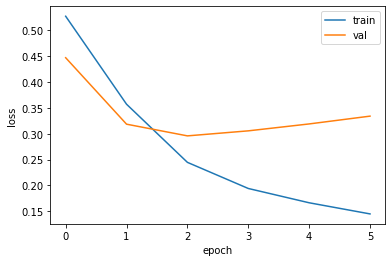

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
def encode(text):
  text = re.sub(r"[^ㄱ-ㅎ가-힣]", " ", text)
  text = re.sub(r"\d+", " ", text)
  new_sentence = okt.morphs(text, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  x_train=np.array(encoded)
  from tensorflow.keras.preprocessing.sequence import pad_sequences
  pad_new = pad_sequences(x_train, maxlen = 128) # 패딩
  return pad_new

In [39]:
def predict_test(text):
    model = keras.models.load_model('/content/abuse.h5')
    indices = encode(text)
    result = model.predict(indices)
    print(result)
    result = np.where(result>0.5, 1,0)
    print(result)
    yok_type = ''
    if result == 0.0:
        yok_type = '욕아님'
    else:
        yok_type = '욕'
    return yok_type

In [29]:
asdf=df[df['label']==1]['text']

In [30]:
len(asdf)

2945

In [78]:
predict_test('ㅅㅂ')

[[0.59099567]]
[[1]]


'욕'

In [ ]:
b=[]
a=''
for i in asdf:
  b.append(i)
for j in b[-5:]:
  print(j)
  a=j
  predict_test(j)
a

In [ ]:
indices = encode('개빡치네')
result=model.predict(indices)
# result = np.argmax(result, axis=1)
result